In [ ]:
# Solo se usa en caso de usar colab
# from google.colab import drive
# drive.mount('/content/drive')
# import sys
# sys.path.append('/content/drive/MyDrive/Colab Notebooks/covid19_forecast-main/')
# !pip install numpyro
# !pip install Pyro4
# !pip3 install pyro-ppl 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from matplotlib.dates import date2num, num2date
from matplotlib.colors import ListedColormap
from matplotlib import dates as mdates
from matplotlib.patches import Patch
from matplotlib import pyplot as plt
from matplotlib import ticker

import os

master_path = '/content/drive/MyDrive/Colab Notebooks/covid19_forecast-main/'

def plot_fit(df_fit, df_data, y_label='Deaths', y_lim_up = 200, color='blue', col_data='smoothed_death', col_up='high_95', col_down='low_95', col_point='median', ax=None, sharey=True,   forecast=True, path_to_save=None):
    """ df_fit with columns:
            'mean', 'median', 'std', 'low_95', 'high_95', 'low_80', 'high_80', 'low_50', 'high_50', 'type'
            type in ['estimate', 'forecast']

        df_data with columns:
                    'confirmed', 'death', 'smoothed_confirmed', 'smoothed_death', 'type'
                    type in ['fitted', 'preliminary']
    """

    df_estimate = df_fit.copy(); df_estimate = df_estimate[ df_estimate.index.get_level_values('type') =='estimate' ]
    df_forecast = df_fit.copy(); df_forecast = df_forecast[ df_forecast.index.get_level_values('type') =='forecast' ]

    df_data_fitted = df_data.copy(); df_data_fitted = df_data_fitted[df_data_fitted.type=='fitted']
    df_data_preliminary = df_data.copy(); df_data_preliminary = df_data_preliminary[df_data_preliminary.type=='preliminary']

    if ax:
      fig, axes = ax
      lab = 0
    else: 
      fig, axes = plt.subplots(1, 1, figsize=(30, 10), sharey=sharey)
      lab = 1
      axes.fill_between(df_estimate.index.get_level_values('date'), df_estimate[col_down], df_estimate[col_up], color='gray', alpha=0.4, label='95 CI - Nowcast')
      axes.plot(df_estimate.index.get_level_values('date'), df_estimate[col_point], color='black', alpha=0.4, label='Median - Nowcast')
      # axes[1].fill_between(df_estimate.iloc[-10:].index.get_level_values('date'), df_estimate.iloc[-10:][col_up], df_estimate.iloc[-10:][col_down], color='gray', alpha=0.4)
      # axes[1].plot(df_estimate.iloc[-10:].index.get_level_values('date'), df_estimate.iloc[-10:][col_point], color='black', alpha=0.4)
      # axes[1].scatter(df_estimate.iloc[-10:].index.get_level_values('date'), df_data_fitted.iloc[-10:][col_data], facecolor='black', alpha=0.6, edgecolor='black', s=50)
      axes.scatter(df_data_fitted.index.values, df_data_fitted[col_data], facecolor='black', alpha=0.6, edgecolor='black', s=30)
    (y1_l, y2_l) = axes.get_ylim()

    #axes[0].fill_between(df_forecast.index.get_level_values('date'), df_forecast[col_down], df_forecast[col_up], color=color, alpha=0.6, label='95% CI')
    #axes[0].fill_between(df_forecast.index.get_level_values('date'), df_forecast['low_80'], df_forecast['high_80'], color=color, alpha=0.4, label='80% CI')
    axes.fill_between(df_forecast.index.get_level_values('date'), df_forecast['low_50'], df_forecast['high_50'], color=color, alpha=0.4, label='50% CI')

    axes.plot(df_forecast.index.get_level_values('date'), df_forecast[col_point], color=color, alpha=0.4, label='Forecast - Median')
    axes.scatter(df_forecast.index.get_level_values('date'), df_forecast[col_point], edgecolor='k', facecolor='white', s=10)
    axes.tick_params(axis='both', labelsize=15)

    
    #axes[1].fill_between(df_forecast.index.get_level_values('date'), df_forecast[col_down], df_forecast[col_up], color=color, alpha=0.2, label='90% CI')
    #axes[1].fill_between(df_forecast.index.get_level_values('date'), df_forecast['low_80'], df_forecast['high_80'], color=color, alpha=0.4, label='80% CI')
    # axes[1].fill_between(df_forecast.index.get_level_values('date'), df_forecast['low_50'], df_forecast['high_50'], color=color, alpha=0.6, label='50% CI')

    # axes[1].plot(df_forecast.index.get_level_values('date'), df_forecast[col_point], color='black', alpha=0.4)
    
    # axes[1].scatter(df_data_preliminary.index.values, df_data_preliminary[col_data], edgecolor='k', facecolor='red', s=50, label='Preliminary data')

    if lab == 1:
      #for ax in axes:
          axes.xaxis.set_major_locator(mdates.MonthLocator())
          axes.xaxis.set_major_locator(mdates.YearLocator())
          axes.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
          #ax.xaxis.set_minor_locator(mdates.DayLocator())
          #ax.xaxis.set_major_locator(mdates.WeekdayLocator())
          axes.xaxis.set_major_locator(mdates.MonthLocator())
          axes.spines['top'].set_visible(False)
          axes.spines['right'].set_visible(False)
          axes.spines['left'].set_visible(False)
          axes.spines['bottom'].set_visible(False)
          axes.grid(which='major', axis='y', c='k', alpha=.1, zorder=-2)
          axes.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.0f}"))
          axes.set_ylabel(y_label, size=15)
          axes.set_ylim( (y1_l, y_lim_up) )
          axes.legend(loc='upper left')

    # axes[1].xaxis.set_major_locator(mdates.MonthLocator())
    # axes[1].xaxis.set_major_formatter(mdates.DateFormatter('%d-%b'))
    # axes[1].xaxis.set_minor_locator(mdates.DayLocator())
    # axes[1].xaxis.set_minor_formatter(mdates.DateFormatter('%d'))

    # axes[1].xaxis.set_major_locator(mdates.WeekdayLocator())
    # axes[1].xaxis.set_major_locator(mdates.MonthLocator())
    # axes[1].tick_params(which='both', axis='both', labelrotation=90, labelsize=15)

    # axes[1].grid(which='both', axis='x', c='k', alpha=.1, zorder=-2)
    axes.grid(which='major', axis='x', c='k', alpha=.1, zorder=-2)
    plt.tight_layout()
    plt.show()

    if path_to_save:
        fig.savefig(path_to_save, dpi=300, bbox_inches='tight', transparent=False)
    plt.close()

    return fig, axes

In [ ]:
from functions.adjust_cases_functions import prepare_cases
from functions.general_utils import  get_bool

# from global_config import config
from models.seird_model import SEIRModel
from models.seird_model import SEIRD

#from functions.plot_utils import plot_fit


from datetime import date, timedelta
import pandas as pd
import numpy as np
import datetime
import os

import sys

drop_last_weeks=False


data  =  pd.read_csv(os.path.join(master_path,'incidence_data.csv'), parse_dates=['date_time'],
                    dayfirst=True).set_index('date_time')
data = data.resample('W-sun').sum().fillna(0)[['num_cases','num_diseased']]
data  = prepare_cases(data, col='num_cases', cutoff=0)    # .rename({'smoothed_num_cases':'num_cases'})
data  = prepare_cases(data, col='num_diseased', cutoff=0) # .rename({'smoothed_num_cases':'num_cases'})


data = data.rename(columns={'num_cases': 'confirmed', 'num_diseased':'death'})[['confirmed', 'death']]
data = prepare_cases(data, col='confirmed')
data = prepare_cases(data, col='death')

data['type']            = 'fitted'
if drop_last_weeks:
    print("*** Droping last 2wk ***")
    data.iloc[-14:]['type'] = 'preliminary'




/content/drive/MyDrive/Colab Notebooks/covid19_forecast-main/weekly_forecast/2021-01-03


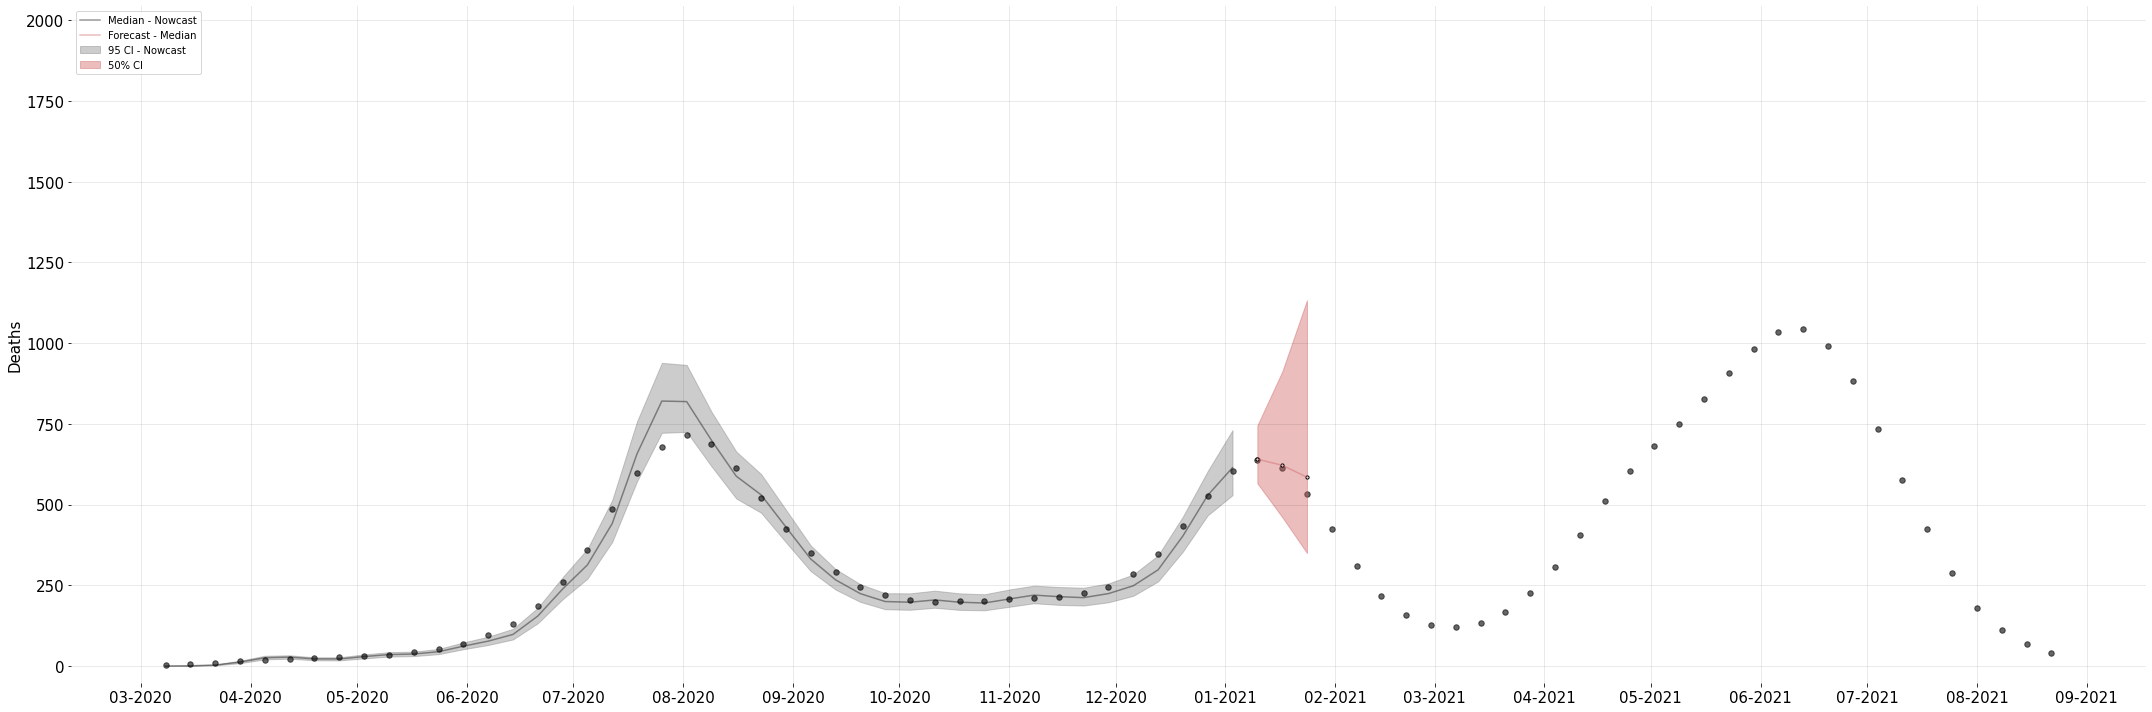

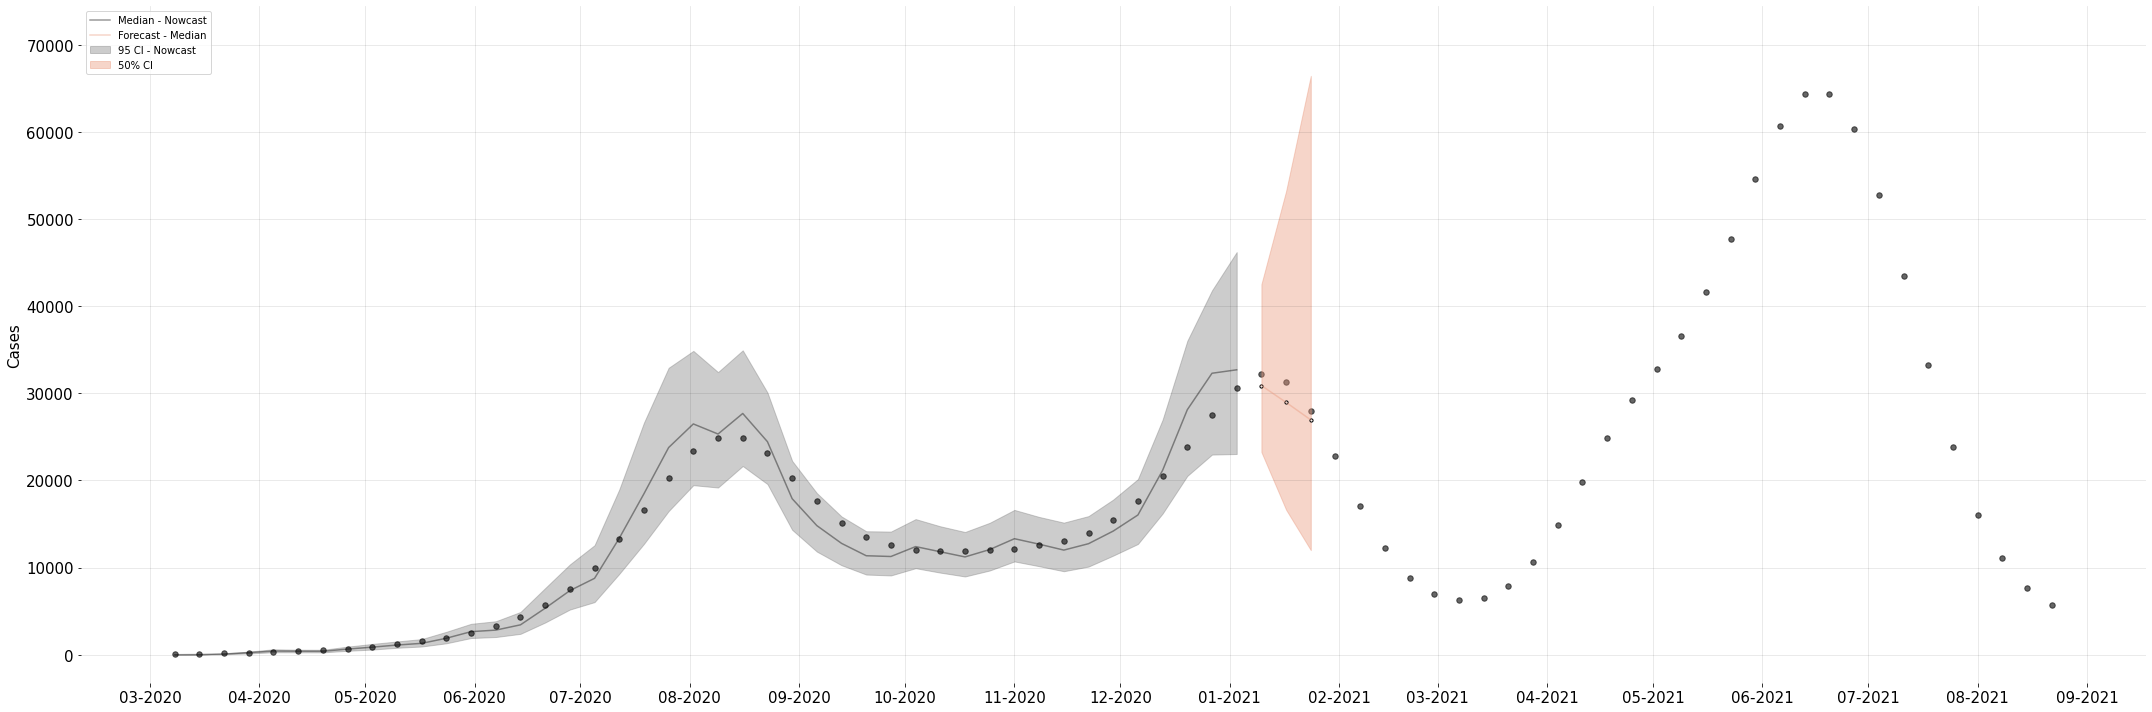

/content/drive/MyDrive/Colab Notebooks/covid19_forecast-main/weekly_forecast/2021-01-17


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/content/drive/MyDrive/Colab Notebooks/covid19_forecast-main/weekly_forecast/2021-01-31


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/content/drive/MyDrive/Colab Notebooks/covid19_forecast-main/weekly_forecast/2021-02-14


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/content/drive/MyDrive/Colab Notebooks/covid19_forecast-main/weekly_forecast/2021-02-28


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/content/drive/MyDrive/Colab Notebooks/covid19_forecast-main/weekly_forecast/2021-03-14


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/content/drive/MyDrive/Colab Notebooks/covid19_forecast-main/weekly_forecast/2021-03-28


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/content/drive/MyDrive/Colab Notebooks/covid19_forecast-main/weekly_forecast/2021-04-11


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/content/drive/MyDrive/Colab Notebooks/covid19_forecast-main/weekly_forecast/2021-04-25


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/content/drive/MyDrive/Colab Notebooks/covid19_forecast-main/weekly_forecast/2021-05-09


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/content/drive/MyDrive/Colab Notebooks/covid19_forecast-main/weekly_forecast/2021-05-23


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/content/drive/MyDrive/Colab Notebooks/covid19_forecast-main/weekly_forecast/2021-06-06


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/content/drive/MyDrive/Colab Notebooks/covid19_forecast-main/weekly_forecast/2021-06-20


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/content/drive/MyDrive/Colab Notebooks/covid19_forecast-main/weekly_forecast/2021-07-04


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/content/drive/MyDrive/Colab Notebooks/covid19_forecast-main/weekly_forecast/2021-07-18


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/content/drive/MyDrive/Colab Notebooks/covid19_forecast-main/weekly_forecast/2021-08-01


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

/content/drive/MyDrive/Colab Notebooks/covid19_forecast-main/weekly_forecast/2021-08-15


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
T_future = 5
mon=[304, 311, 318, 325, 332, 339, 346, 353, 360, 367, 374, 381, 388, 395, 402, 
     409, 416, 423, 430, 437, 444, 451, 458, 465, 472, 479, 486, 493, 500, 507, 
     514, 521, 528]
a = None
b = None
cont = 0
for idx in mon:
  if cont%2 == 0:
    path_to_save = os.path.join(master_path,'weekly_forecast' , pd.to_datetime(data[data.type=='fitted'].index.values[cont+43]).strftime('%Y-%m-%d'))
    print(path_to_save)

    df_deaths = pd.read_csv(os.path.join(path_to_save, 'deaths_df.csv'))
    df_deaths['date'] = pd.to_datetime(df_deaths['date'])
    df_deaths = df_deaths.set_index('date')
    df_deaths = df_deaths.groupby('type').resample('W-sun').sum()
    df_deaths = df_deaths.iloc[:cont+42+T_future]

    df_cases  = pd.read_csv(os.path.join(path_to_save, 'cases_df.csv')) #.set_index('date')
    df_cases['date'] = pd.to_datetime(df_cases['date'])
    df_cases = df_cases.set_index('date')
    df_cases = df_cases.groupby('type').resample('W-sun').sum()
    df_cases = df_cases.iloc[:cont+42+T_future]


    d_max = data.smoothed_death.max()      + 10**int(np.log10(data.smoothed_death.max()))
    c_max = data.smoothed_confirmed.max()  + 10**int(np.log10(data.smoothed_confirmed.max()))

    a = plot_fit(df_deaths, data, col_data='smoothed_death',   y_lim_up = d_max, y_label='Deaths', color='indianred', path_to_save=os.path.join(master_path,'figures/mcmc/deaths.png'), ax=a)
    b = plot_fit(df_cases, data, col_data='smoothed_confirmed', y_lim_up = c_max,  y_label='Cases', color='darksalmon', path_to_save=os.path.join(master_path,'figures/mcmc/cases.png'), ax=b)

  cont+=1

os.popen('cp figures/mcmc/deaths.png {}'.format(os.path.join(path_to_save, 'deaths.png')))
os.popen('cp figures/mcmc/cases.png {}'.format(os.path.join(path_to_save, 'cases.png')))

from PIL import Image

im1 = Image.open(os.path.join(master_path,'figures/mcmc/deaths.png')).convert('RGB')
im2 = Image.open(os.path.join(master_path,'figures/mcmc/cases.png')).convert('RGB')

im_list = [im2]

pdf1_filename = "./report_{}.pdf".format(pd.to_datetime(data[data.type=='fitted'].index.values[-1]).strftime('%Y-%m-%d'))
im1.save(pdf1_filename, "PDF" ,resolution=100.0, save_all=True, append_images=im_list)